# PoP Intensity

For a deeper dive into the project and to explore all the details, please visit our [README file](readme.md). You'll find everything you need to know, from the project's background and objectives to the nitty-gritty of how it works.

- Date: 2025.01.05
- Researchers:
    - Dr. Lázaro Bustio-Martínez
    - Dr. Vitali Herrera-Semenets
    - Dr. Miguel Á. Álvarez-Carmona
    - Dr. Jorge Á. González-Ordiano
    - Dr. Jan van den Berg
    - Dr. Pedro Á. Santander-Molina
- Contact: [Dr. Lázaro Bustio Martínez](lazaro.bustio@ibero.mx).
- Python version: 3.12.8

Determine the intensity level for each principle of persuasion. This code is developed for Python 3.12.8.

# Defining logging

In [24]:
import logging

# Colores ANSI
class LogColors:
    INFO_BOLD = "\033[1;32m"  # Verde intenso (negrita) para INFO
    INFO = "\033[0;32m"  # Verde suave para INFO (esto lo cambiaré a verde lima)
    WARNING_BOLD = "\033[1;33m"  # Amarillo intenso (negrita) para WARNING
    WARNING = "\033[0;33m"  # Amarillo suave para WARNING
    ERROR_BOLD = "\033[1;31m"  # Rojo intenso (negrita) para ERROR
    ERROR = "\033[0;31m"  # Rojo suave para ERROR
    RESET = "\033[0m"  # Resetear el color

# Formateador personalizado
class ColoredFormatter(logging.Formatter):
    def format(self, record):
        # Colorear el tipo de mensaje (levelname) y el mensaje del log
        if record.levelname == "INFO":
            record.levelname = f"{LogColors.INFO_BOLD}{record.levelname}{LogColors.RESET}"
            record.msg = f"{LogColors.INFO}{record.msg}{LogColors.RESET}"
        elif record.levelname == "WARNING":
            record.levelname = f"{LogColors.WARNING_BOLD}{record.levelname}{LogColors.RESET}"
            record.msg = f"{LogColors.WARNING}{record.msg}{LogColors.RESET}"
        elif record.levelname == "ERROR":
            record.levelname = f"{LogColors.ERROR_BOLD}{record.levelname}{LogColors.RESET}"
            record.msg = f"{LogColors.ERROR}{record.msg}{LogColors.RESET}"
       
        return super().format(record)

# Configuración del logger
logger = logging.getLogger("MiLogger")
logger.setLevel(logging.INFO)

# Evitar manejadores duplicados
logger.handlers.clear()

# Manejador de consola con colores
console_handler = logging.StreamHandler()
formato = ColoredFormatter("%(asctime)s: %(levelname)s - %(message)s", datefmt="%Y-%m-%d %H:%M:%S")
console_handler.setFormatter(formato)
logger.addHandler(console_handler)

# Desactivar el logger raíz (limpiar los manejadores raíz)
logging.getLogger().handlers.clear()

# Ejemplo de uso
logger.info("The code has started running correctly.")
logger.warning("This is a warning message.")
logger.error("An error occurred in the code.")

2025-01-05 23:49:03: INFO - The code has started running correctly.
2025-01-05 23:49:03: WARNING - This is a warning message.
2025-01-05 23:49:03: ERROR - An error occurred in the code.


# Installing Libraries

To avoid compatibility issues among different environments, all the necessary libraries are first installed and then imported. Any additional libraries needed should be installed in this cell before importing.

In [ ]:
logger.info("Starting the installation of required libraries...")

%pip install pandas
%pip install numpy
%pip install matplotlib
%pip install seaborn
%pip install scipy
%pip install scikit-learn
%pip install transformers
%pip install prettytable
%pip install torch
%pip install psutil 
%pip install gputil
%pip install pandasgui

# Imports

After installing the libraries, then they can be imported and used in the code.

In [25]:
logger.info("Starting the import of necessary libraries for the project...")

import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
from scipy.spatial.distance import cdist
import sklearn
from sklearn.cluster import KMeans, DBSCAN, OPTICS, AgglomerativeClustering
from sklearn.decomposition import PCA
from sklearn.metrics import (
    silhouette_score, 
    silhouette_samples, 
    pairwise_distances, 
    euclidean_distances
)
from sklearn.mixture import GaussianMixture
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from transformers import DistilBertTokenizer, DistilBertModel
import prettytable
from prettytable import PrettyTable
import torch
import platform
import psutil
import GPUtil
from transformers import __version__ as transformers_version
import json
import os
from pandasgui import show
import warnings

warnings.filterwarnings("ignore", category=FutureWarning)

2025-01-05 23:49:08: INFO - Starting the import of necessary libraries for the project...


Once again, to avoid compatibility issues, generate the requirements file from the libraries used ans save it in `requirements.txt` file.

In [ ]:
# Generar requirements.txt 
%pip freeze > requirements.txt
logger.info("'requirements.txt' file has been generated successfully!")

Retrieve the versions of the utilized libraries to ensure compatibility and consistency across different environments.

In [26]:
def get_library_versions():
    logger.info(f"pandas version: {pd.__version__}")
    logger.info(f"numpy version: {np.__version__}")
    logger.info(f"matplotlib version: {matplotlib.__version__}")
    logger.info(f"scipy version: {scipy.__version__}")
    logger.info(f"scikit-learn version: {sklearn.__version__}")
    logger.info(f"transformers version: {transformers_version}")
    logger.info(f"prettytable version: {prettytable.__version__}")
    logger.info(f"torch version: {torch.__version__}")

def get_system_info():
    logger.info(f"Python version: {platform.python_version()}")
    logger.info(f"Platform: {platform.system()} {platform.release()}")
    logger.info(f"Processor: {platform.processor()}")
    logger.info(f"Architecture: {platform.architecture()[0]}")
    logger.info(f"Number of CPUs: {psutil.cpu_count(logical=True)}")
    logger.info(f"Total RAM: {psutil.virtual_memory().total / (1024 ** 3):.2f} GB")
    
    gpus = GPUtil.getGPUs()
    if gpus:
        for gpu in gpus:
            logger.info(f"GPU: {gpu.name}")
            logger.info(f"  GPU Memory Total: {gpu.memoryTotal} MB")
            logger.info(f"  GPU Memory Free: {gpu.memoryFree} MB")
            logger.info(f"  GPU Memory Used: {gpu.memoryUsed} MB")
            logger.info(f"  GPU Utilization: {gpu.memoryUtil * 100}%")
    else:
        logger.warning("No GPU detected")

logger.info("Library Versions:")
get_library_versions()

logger.info("System details:")
get_system_info()

2025-01-05 23:49:12: INFO - Library Versions:
2025-01-05 23:49:12: INFO - pandas version: 2.2.3
2025-01-05 23:49:12: INFO - numpy version: 2.2.1
2025-01-05 23:49:12: INFO - matplotlib version: 3.10.0
2025-01-05 23:49:12: INFO - scipy version: 1.15.0
2025-01-05 23:49:12: INFO - scikit-learn version: 1.6.0
2025-01-05 23:49:12: INFO - transformers version: 4.47.1
2025-01-05 23:49:12: INFO - prettytable version: 3.12.0
2025-01-05 23:49:12: INFO - torch version: 2.5.1+cpu
2025-01-05 23:49:12: INFO - System details:
2025-01-05 23:49:12: INFO - Python version: 3.12.8
2025-01-05 23:49:12: INFO - Platform: Windows 11
2025-01-05 23:49:12: INFO - Processor: Intel64 Family 6 Model 186 Stepping 2, GenuineIntel
2025-01-05 23:49:12: INFO - Architecture: 64bit
2025-01-05 23:49:12: INFO - Number of CPUs: 16
2025-01-05 23:49:12: INFO - Total RAM: 15.73 GB
2025-01-05 23:49:12: WARNING - No GPU detected


# Data gathering and filtering

Phishing messages and principles of persuasion are stored in `data\pop_dataset_Full(Tiltan).csv` that needs to be loaded.

In [27]:
logger.info("Reading the data file to begin processing...")

data_df = pd.read_csv('data/pop_dataset_Full(Tiltan).csv', header=1)
pops = ["authority"] #["authority", "distraction", "liking_similarity_deception","social_proof", "commitment_integrity_reciprocation"]
data_phish = data_df[data_df["class"] == 1]
data = data_phish[["id", "path", "hash", "subject", "txt"] + pops + ["class", "label"]]
data.head()

2025-01-05 23:49:15: INFO - Reading the data file to begin processing...


,id,path,hash,subject,txt,authority,class,label
1087,9762,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,52f8f694517011d944083f22ace9448e,Urgent Fraud Prevention Group Notice,Urgent Fraud Prevention Group Notice You have...,1,1,Phish
1088,9763,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,b4dab37a7c9be664f7bbd4a5f48e9409,your paypal account user domain,Dear PayPal Inc. account holder PayPal is cons...,1,1,Phish
1089,9764,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,c5a00795f1af36457fa3e6da1ce902ce,Notification Update Your eBay Profile,Dear eBay Customer As the domain.com and infor...,1,1,Phish
1090,9765,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,5d668953b7cf30441baffbb296702768,Thanks again for using online payments,E mail Security Information. Dear Customer Tha...,0,1,Phish
1091,9766,/content/gdrive/MyDrive/Colabs/02.-Proyectos/P...,0009311d8938d26b6807618aa3febc78,PayPal Flagged Account,Dear PayPal Member Your account has been rando...,1,1,Phish


# Data representation

Messages are stored as text, but they need to be represented in a way that facilitates processing. The data representation method that works best for phishing detection is BERT. BERT (Bidirectional Encoder Representations from Transformers) has the ability to understand the context of words in both directions, enabling better interpretation and analysis of the text. Additionally, BERT has proven highly effective in text classification tasks and detecting anomalous patterns—essential characteristics for identifying phishing messages. Leveraging these capabilities, BERT can more accurately detect malicious messages and protect users against phishing attacks.

To implement this, DistilBERT is employed. DistilBERT uses a tokenizer that converts the input text into tokens that the model can process. This model is a smaller, faster, and lighter version of BERT, designed to deliver high performance while requiring fewer computational resources. An informational log entry is added to indicate that both the DistilBERT tokenizer and model have been loaded successfully. By utilizing DistilBERT, which retains 97% of BERT's language understanding capabilities while being more efficient, the system enhances its ability to detect phishing attempts in a streamlined and resource-effective manner.

In [28]:
# Cargar el tokenizer y el modelo base de DistilBERT
tokenizer = DistilBertTokenizer.from_pretrained("distilbert-base-uncased")
model = DistilBertModel.from_pretrained("distilbert-base-uncased")  # Modelo base
logger.info("DistilBERT tokenizer and model have been loaded successfully!")

2025-01-05 23:49:19: INFO - DistilBERT tokenizer and model have been loaded successfully!


It is needed to define a function that processes a list of texts to generate their embeddings using a pre-trained model.

In [29]:
# Función para obtener embeddings del texto
def get_embeddings(texts):
    logger.info("Starting to process texts for embeddings...")
    inputs = tokenizer(texts, return_tensors="pt", padding=True, truncation=True, max_length=512)
    logger.info(f"Tokenized {len(texts)} texts.")
    
    with torch.no_grad():
        logger.info("Generating embeddings...")
        outputs = model(**inputs)
    
    # Usamos la media de los embeddings de las palabras (output.last_hidden_state)
    embeddings = outputs.last_hidden_state.mean(dim=1).numpy()
    
    logger.info(f"Generated embeddings with shape: {embeddings.shape}")
    return embeddings

Following it is needed to filter messages according to different principles of persuasion and to calculate their vector representations, known as **embeddings**. To do so, a dictionary `embeddings` is needed, which contains the embeddings generated from the filtered texts, organized by principle of persuasion.

In [30]:
# Crear un diccionario para almacenar los DataFrames filtrados
embeddings = {} # Contiene los embeddings de los textos filtrados por cada principio de persuasion

logger.info("Starting to filter data for each principle of persuasion")

for principle in pops:
    # Informar sobre el principio actual
    logger.info(f"Filtering data for principle: '{principle}'...")
    
    # Filtrar las filas donde el principio en cuestión tenga valor 1
    filtered_df = data.loc[data[principle] == 1, ['id', 'path', 'hash', 'subject', 'txt', principle, 'class', 'label']]

    # Obtener embeddings para los textos
    embed = get_embeddings(filtered_df["txt"].tolist())
    
    # Convertir las embeddings en DataFrame y agregar las columnas "label" y "class"
    embed_df = pd.DataFrame(embed)
    embed_df["label"] = filtered_df["label"].values
    embed_df["class"] = filtered_df["class"].values
    
    # Guardar los embeddings en el diccionario
    embeddings[principle] = embed_df

logger.info("Data filtering completed for all principles.")

# Crear una tabla resumen
summary_table = PrettyTable()
summary_table.field_names = ["Principle", "Number of Instances"]

# Agregar datos a la tabla resumen
for principle, filtered_df in embeddings.items():
    summary_table.add_row([principle, filtered_df.shape[0]])

# Mostrar la tabla resumen
print("\nSummary of Instances per Principle")
print(summary_table)

2025-01-05 23:49:24: INFO - Starting to filter data for each principle of persuasion
2025-01-05 23:49:24: INFO - Filtering data for principle: 'authority'...
2025-01-05 23:49:24: INFO - Starting to process texts for embeddings...
2025-01-05 23:49:25: INFO - Tokenized 598 texts.
2025-01-05 23:49:25: INFO - Generating embeddings...
2025-01-05 23:50:57: INFO - Generated embeddings with shape: (598, 768)
2025-01-05 23:50:58: INFO - Data filtering completed for all principles.



Summary of Instances per Principle
+-----------+---------------------+
| Principle | Number of Instances |
+-----------+---------------------+
| authority |         598         |
+-----------+---------------------+


Once the dataset has been processed and embeddings for each principle of persuasion have been generated, the resulting `embeddings` dictionary is saved as a JSON file. This ensures that the data is stored in a compatible and easily accessible format for future use.


In [31]:
# Convertir cada DataFrame en el diccionario embeddings a un formato compatible con JSON
embeddings_json = {principle: embed_df.to_dict(orient='records') for principle, embed_df in embeddings.items()}

# Guardar el diccionario embeddings en un archivo JSON
path = "results/embeddings_dict.json"
with open(path, 'w') as f:
    json.dump(embeddings_json, f, indent=4)

logger.info(f"Embeddings dictionary has been saved to '{path}' sucessfully!")


2025-01-05 23:51:38: INFO - Embeddings dictionary has been saved to 'results/embeddings_dict.json' sucessfully!


# Clustering

The premise guiding this research is that messages of equal intensity concerning a specific principle of persuasion should be grouped together. Therefore, it is essential to evaluate various clustering algorithms to identify which one generates the most consistent groups. Additionally, the research aims to verify whether the resulting groups indeed contain messages with similar intensities for each principle of persuasion. This approach not only seeks to enhance the understanding of message intensity but also to ensure that the selected algorithms effectively reflect the underlying similarities among the messages.

To achieve this, a pipeline will be implemented in which various clustering algorithms will be evaluated, including k-Means, DBSCAN, OPTICS, and Gaussian Mixture Models (while remaining open to the use of others). The algorithms that require specifying the number of groups to be constructed (such as k-Means and GMM) will analytically determine the optimal number of groups to obtain. The quality of each group will be assessed, and the messages within each group will be analyzed to verify the hypothesis that messages with similar intensities according to a given principle of persuasion will be clustered together.

Two arrays will be defined to store the clustering algorithms (`clustering_algos`) and their respective configurations (`param_mapping`) that will be used.

In [32]:
clustering_algos = {
    'KMeans': KMeans, 
    'DBSCAN': DBSCAN,
    'GaussianMixture': GaussianMixture,
    'OPTICS': OPTICS
}

# Diccionario con los parámetros correctos para cada algoritmo
param_mapping = {
    'KMeans': 'n_clusters',  # KMeans usa 'n_clusters'
    'GaussianMixture': 'n_components',  # GaussianMixture usa 'n_components'
    'DBSCAN': None,  # DBSCAN no usa un parámetro 'n_clusters'
    'OPTICS': None   # OPTICS no usa 'n_clusters'
}

Since the number of groups emerging from the data is not known a priori (although it can be empirically estimated), it is advisable to automatically determine the optimal number of groups for some algorithms (such as k-Means and GMM). In the case of DBSCAN and OPTICS, the number of clusters is not a parameter that needs to be specified in advance, as these algorithms can automatically detect clusters based on the data's density and spatial relationships. However, the effectiveness of these algorithms often depends on correctly choosing other parameters, such as the distance threshold (epsilon for DBSCAN) or the minimum number of points required to form a cluster (min_samples for DBSCAN and OPTICS). In practice, the number of clusters identified may vary depending on these parameters.

For HCA (Hierarchical Clustering), the number of clusters must be specified in advance if a flat clustering result is desired. Typically, a dendrogram is used to visualize the hierarchical structure, and the number of clusters is determined by cutting the dendrogram at a certain level. This cut is often based on the desired granularity of the clusters or by identifying a significant drop in the linkage distance.

For determining the optimum number of clusters (`k`) for k-Means and GMM, the [elbow method](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) can be used, which involves exhaustively evaluating different numbers of groups, from 2 to a maximum limit. The method plots a metric (such as inertia for k-Means or the log-likelihood for GMM) against the number of clusters, and the "elbow" point—where the rate of decrease slows down—indicates the optimal number of clusters. However, this approach can be computationally expensive. Once the optimal number of groups has been identified, clustering is performed, and the model can be used to assign data points to the identified groups.


In [33]:
def find_optimal_k_elbow_method(X, algorithm_class, principle=None, export_images=False, max_k=10):
    inertia = []  # Lista para almacenar la métrica de calidad
    K = range(2, max_k + 1, 1)  # Rango de valores para k

    if algorithm_class not in [KMeans, GaussianMixture]:  
        # Solo ejecutamos el método para KMeans y GaussianMixture
        logger.warning(f"It is not necessary to search for the optimal number of clusters for {algorithm_class.__name__}.")
        return None

    for k in K:
        if algorithm_class == GaussianMixture:
            # Para Gaussian Mixture
            cluster_algo = algorithm_class(n_components=k).fit(X)
            labels = cluster_algo.predict(X)
            
            # Métrica: Puntuación de silueta
            if len(np.unique(labels)) > 1:
                inertia.append(silhouette_score(X, labels))
            else:
                inertia.append(-1)
        
        elif algorithm_class == KMeans:
            # Solo para KMeans se usa la inercia (distancia desde los puntos al centro de cada cluster)
            cluster_algo = algorithm_class(n_clusters=k).fit(X)
            inertia.append(cluster_algo.inertia_)

    # Calcular el punto del codo aplicando la segunda derivada para encontrar el punto de inflexión
    diff = np.diff(inertia)
    diff2 = np.diff(diff)
    elbow_index = np.argmax(diff2) + 2  + 1 # +2 para ajustar el índice al rango original de K, +1 para el índice 0
    optimal_k = elbow_index

    # Exportar la gráfica si se solicita
    if export_images:
        plt.figure(figsize=(8, 5))
        plt.plot(K, inertia, 'bo-')
        plt.xlabel('Number of clusters (k)')
        plt.ylabel('Inertia / Metric')

        # Título que incluye el algoritmo, el principio y el número óptimo de k
        algo_name = algorithm_class.__name__
        principle_name = principle if principle else "Unknown_Principle"
        plt.title(f"Optimum number of cluster (Algorithm: '{algo_name}', Principle: '{principle_name}', k={optimal_k})")

        # Agregar la línea discontinua roja para el número óptimo de clusters
        plt.axvline(x=optimal_k, color='red', linestyle='--', label=f"Optimal k = {optimal_k}")

        # Añadir la leyenda
        plt.legend()

        # Crear el directorio "results" si no existe
        results_dir = "results"
        os.makedirs(results_dir, exist_ok=True)

        # Nombre del archivo con el algoritmo, principio y k óptimo
        file_name = f"{algo_name}_{principle_name}_k={optimal_k}.png"
        file_path = os.path.join(results_dir, file_name)

        # Guardar la gráfica
        plt.savefig(file_path, format='png')
        plt.show()
        plt.close()  # Cerrar la figura para liberar memoria
        logger.info(f"Optimum number of clusters plot saved to: {file_path}")

    return optimal_k


The function `find_optimal_k_elbow_method` aims to determine the optimal number of clusters (`k`) for a dataset `X` using the [elbow method](https://www.geeksforgeeks.org/elbow-method-for-optimal-value-of-k-in-kmeans/) or equivalent metrics, depending on the clustering algorithm provided. It is compatible with multiple clustering algorithms, including KMeans, DBSCAN, OPTICS, GaussianMixture, and AgglomerativeClustering, and adapts its logic based on the features of each algorithm.

The code computes a quality metric (such as inertia or silhouette score) for different values of `k`, stores the results, and analyzes the second difference in these metrics to identify the "elbow point," which represents the optimal `k`. 

If image export is enabled, it generates and saves a plot that shows the relationship between `k` and the metric, including details about the algorithm and the analyzed principle. Additionally, it organizes the results in a directory and labels the files for easy identification.

Finally, it returns the optimal `k` value found.

Now, the function to detect the optimal number of clusters is used to evaluate the optimal number of clusters for each algorithm based on each persuasion principle.

2025-01-05 23:51:49: INFO - Obtaining the optimum number of clusters for principle: 'authority'
2025-01-05 23:51:49: INFO - Data shape for principle 'authority' after scaling: (598, 768)
2025-01-05 23:51:49: INFO - Using algorithm: KMeans


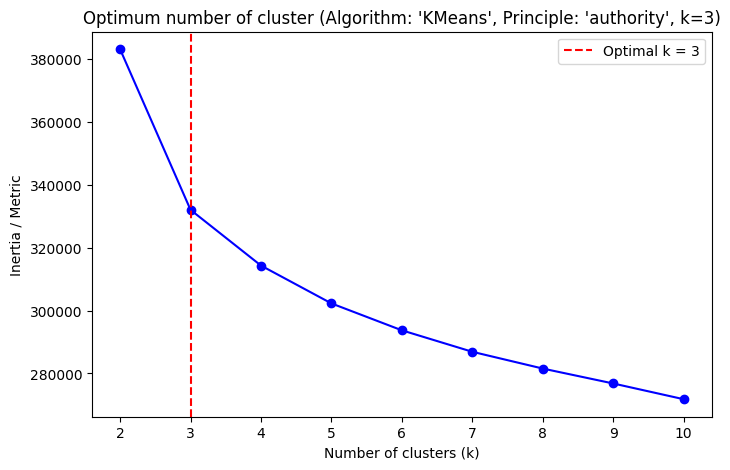

2025-01-05 23:51:49: INFO - Optimum number of clusters plot saved to: results\KMeans_authority_k=3.png
2025-01-05 23:51:49: INFO - Optimal number of clusters for principle 'authority' - 'KMeans': 3
2025-01-05 23:51:49: INFO - Using algorithm: DBSCAN
2025-01-05 23:51:49: WARNING - It is not necessary to search for the optimal number of clusters for DBSCAN.
2025-01-05 23:51:49: INFO - Using algorithm: GaussianMixture


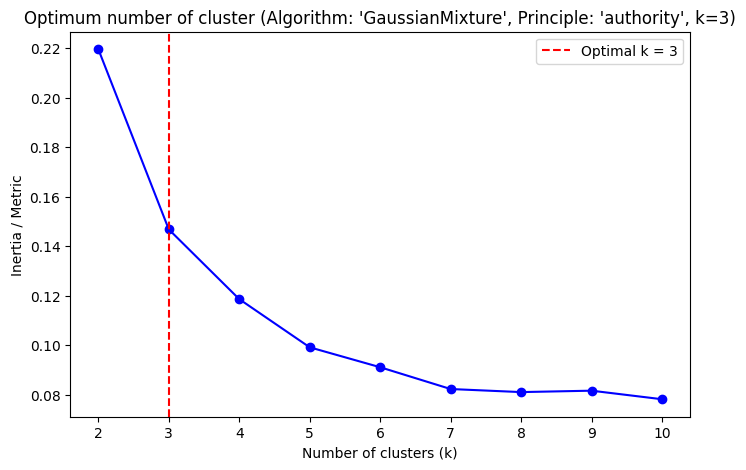

2025-01-05 23:51:56: INFO - Optimum number of clusters plot saved to: results\GaussianMixture_authority_k=3.png
2025-01-05 23:51:56: INFO - Optimal number of clusters for principle 'authority' - 'GaussianMixture': 3
2025-01-05 23:51:56: INFO - Using algorithm: OPTICS
2025-01-05 23:51:56: WARNING - It is not necessary to search for the optimal number of clusters for OPTICS.
2025-01-05 23:51:56: INFO - optimum number of clusters evaluation completed for all principles.


Optimal Number of Clusters (k) for Each Algorithm and Principle:
   Principle  KMeans  GaussianMixture
0  authority       3                3


In [34]:
results = {}
opt_k_dict = {}

for principle, embed_df in embeddings.items():
    logger.info(f"Obtaining the optimum number of clusters for principle: '{principle}'")

    # Preprocesamiento: Escalamiento de los datos. Esto se puede eliminar si los resultados no son satisfactorios.
    X_raw = embed_df.drop(columns=["label", "class"]).values  # Datos sin columnas "label" y "class"
    scaler = StandardScaler()
    X = scaler.fit_transform(X_raw)  # Escalar los datos
    #X = X_raw
    logger.info(f"Data shape for principle '{principle}' after scaling: {X.shape}")

    algo_k_dict = {}
    for name, algo_class in clustering_algos.items():  # Asegurarse de que `clustering_algos` contiene clases
        logger.info(f"Using algorithm: {name}")

        try:
            # Determinar el número óptimo de clusters
            optimal_k = find_optimal_k_elbow_method(
                X, 
                algorithm_class=algo_class, 
                principle=principle,    # Indica el principio 
                export_images=True,     # Exportar la gráfica
                max_k=10                # Máximo número de clusters a evaluar
            )

            if (optimal_k != None):
                algo_k_dict[name] = optimal_k
                opt_k_dict[principle] = algo_k_dict
                logger.info(f"Optimal number of clusters for principle '{principle}' - '{name}': {optimal_k}") 

        except Exception as e:
            logger.error(f"An error occurred while processing '{name}' for principle '{principle}': {e}")

logger.info("optimum number of clusters evaluation completed for all principles.")

# Convertir el diccionario de óptimos de k en un DataFrame
opt_k_df = pd.DataFrame(opt_k_dict).T  # Transponer para que los principios sean las filas
opt_k_df.index.name = "Principle"
opt_k_df.reset_index(inplace=True)  # Convertir el índice en columna para mejor visualización

# Mostrar la tabla de resultados
print("Optimal Number of Clusters (k) for Each Algorithm and Principle:")
print(opt_k_df)

After the analytical method determines the optimal number of groups created, an interactive window is displayed for the analyst to confirm them.

In [35]:
# Mostrar el DataFrame en una ventana interactiva
gui = show(opt_k_df)

# Confirmar y usar los valores actualizados (después de cerrar la GUI)
opt_k_df_updated = gui.get_dataframes()['opt_k_df']
print("Updated DataFrame:")
print(opt_k_df_updated)

PandasGUI INFO — pandasgui.gui — Opening PandasGUI


Updated DataFrame:
   Principle  KMeans  GaussianMixture
0  authority       3                3


The optimal number of clusters confirmed by the analyst is displayed.

In [36]:
opt_k_df_updated

,Principle,KMeans,GaussianMixture
0,authority,3,3


The optimal number of clusters is then stored as the user has confirmed them.

In [37]:
path="results/optimal_k_values.csv"
logger.info("Saving the optimal number of clusters to `{path}}`...")
opt_k_df.to_csv(path, index=False)

2025-01-05 23:52:22: INFO - Saving the optimal number of clusters to `{path}}`...


Now that the optimal number of groups has been determined, the clustering of the data is performed using the pipeline, which evaluates all clustering algorithms with the previously selected optimal number of groups.

2025-01-05 23:52:30: INFO - Evaluating clustering algorithms for principle: 'authority'
2025-01-05 23:52:30: INFO - Data shape for principle 'authority': (598, 768)
2025-01-05 23:52:30: INFO - Using algorithm: KMeans
2025-01-05 23:52:30: INFO - Using optimal number of clusters (3) for algorithm: KMeans
2025-01-05 23:52:31: INFO - Pipeline fitting completed for algorithm: KMeans
2025-01-05 23:52:31: INFO - Labels obtained for algorithm: KMeans
2025-01-05 23:52:31: INFO - Silhouette Score for 'KMeans' on principle 'authority': 0.1867
2025-01-05 23:52:31: INFO - Saved the plot as 'results\authority_KMeans_clusters_3.png'


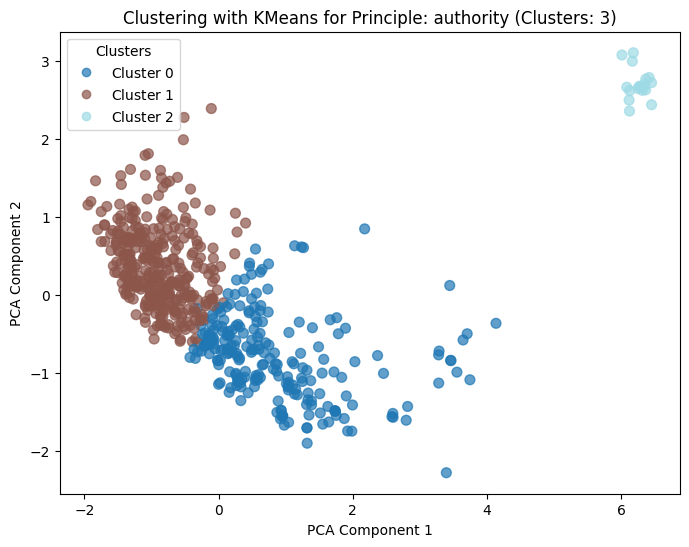

2025-01-05 23:52:31: INFO - Using algorithm: DBSCAN
2025-01-05 23:52:31: INFO - Algorithm 'DBSCAN' does not use 'None'. Proceeding with default parameters.
2025-01-05 23:52:31: INFO - Pipeline fitting completed for algorithm: DBSCAN
2025-01-05 23:52:31: INFO - Labels obtained for algorithm: DBSCAN
2025-01-05 23:52:31: WARNING - Algorithm 'DBSCAN' generated only one cluster for principle 'authority' and was skipped.
2025-01-05 23:52:31: INFO - Using algorithm: GaussianMixture
2025-01-05 23:52:31: INFO - Using optimal number of clusters (3) for algorithm: GaussianMixture
2025-01-05 23:52:45: INFO - Pipeline fitting completed for algorithm: GaussianMixture
2025-01-05 23:52:45: INFO - Labels obtained for algorithm: GaussianMixture
2025-01-05 23:52:45: INFO - Silhouette Score for 'GaussianMixture' on principle 'authority': 0.2271
2025-01-05 23:52:45: INFO - Saved the plot as 'results\authority_GaussianMixture_clusters_2.png'


[0.58361204 0.38461538 0.03177258]


<Figure size 640x480 with 0 Axes>

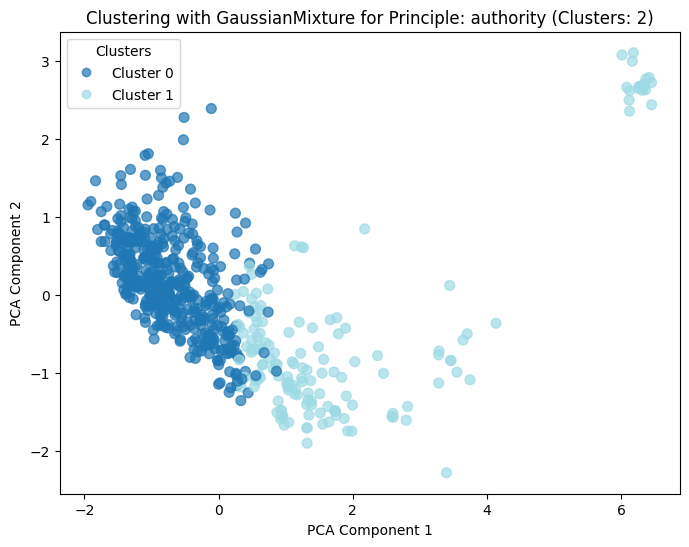

2025-01-05 23:52:45: INFO - Using algorithm: OPTICS
2025-01-05 23:52:45: INFO - Algorithm 'OPTICS' does not use 'None'. Proceeding with default parameters.
2025-01-05 23:52:50: INFO - Pipeline fitting completed for algorithm: OPTICS
2025-01-05 23:52:50: INFO - Labels obtained for algorithm: OPTICS
2025-01-05 23:52:50: INFO - Silhouette Score for 'OPTICS' on principle 'authority': -0.1418
2025-01-05 23:52:50: INFO - Saved the plot as 'results\authority_OPTICS_clusters_10.png'


<Figure size 640x480 with 0 Axes>

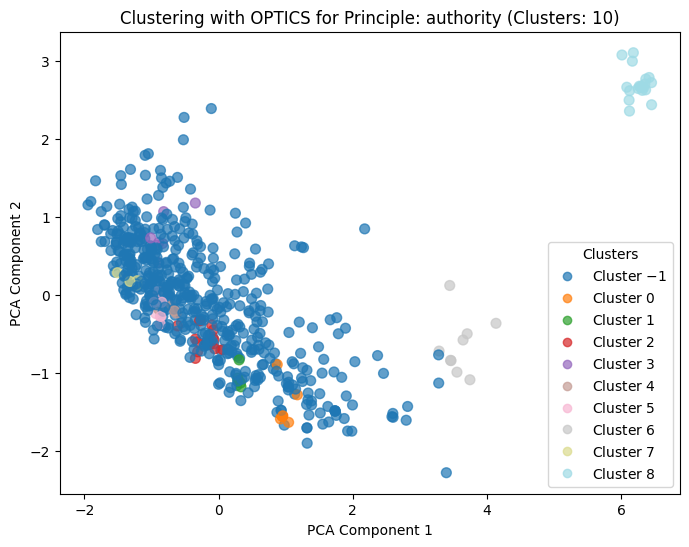

2025-01-05 23:52:50: INFO - Clustering evaluation completed for all principles.


             KMeans  GaussianMixture    OPTICS
Principle                                     
authority  0.186737         0.227072 -0.141847


<Figure size 640x480 with 0 Axes>

In [38]:
# Crear una carpeta para guardar las imágenes si no existe
output_dir = "results"
if not os.path.exists(output_dir):
    os.makedirs(output_dir)

# Evaluar cada algoritmo usando un pipeline para cada principio
results = {}

for principle, embed_df in embeddings.items():
    logger.info(f"Evaluating clustering algorithms for principle: '{principle}'")
    
    X = embed_df.drop(columns=["label", "class"]).values  # Obtener los datos sin las columnas "label" y "class"
    logger.info(f"Data shape for principle '{principle}': {X.shape}")

    # Obtener las configuraciones del número óptimo de clusters para el principio actual
    opt_k_row = opt_k_df_updated[opt_k_df_updated['Principle'] == principle]
    if opt_k_row.empty:
        logger.warning(f"No optimal 'k' configuration found for principle '{principle}'. Skipping...")
        continue

    for name, algo_class in clustering_algos.items():
        logger.info(f"Using algorithm: {name}")

        try:
            # Crear una instancia temporal para verificar si tiene el atributo correspondiente
            algo_instance = algo_class()

            # Verificar el parámetro adecuado para el algoritmo
            param_name = param_mapping.get(name, None)
            
            if param_name:  # Si el algoritmo tiene un parámetro específico para el número de clusters
                if name in opt_k_row.columns:
                    optimal_k = int(opt_k_row[name].values[0])  # Número óptimo de clusters
                    logger.info(f"Using optimal number of clusters ({optimal_k}) for algorithm: {name}")
                else:
                    logger.warning(f"Algorithm '{name}' not found in optimal k configurations. Skipping...")
                    continue

                # Asegurarse de que param_name sea una cadena
                if isinstance(param_name, str):  # Comprobar si param_name es una cadena
                    param_dict = {param_name: optimal_k}  # Ajustar el parámetro con el número óptimo de clusters
                    #if name == 'KMeans':
                    param_dict['n_init'] = 42  # Aseguramos que n_init esté configurado en 42

                    # Crear el pipeline con el número óptimo de clusters
                    pipeline = Pipeline([
                        ('scaler', StandardScaler()),  # Estandarizar las características
                        ('cluster', algo_class(**param_dict))  # Configuración con el número óptimo de clusters
                    ])
                else:
                    logger.error(f"Invalid parameter name for algorithm {name}. Expected a string, got {type(param_name)}.")
                    continue

            else:  # Algoritmos que no tienen un parámetro para el número de clusters
                logger.info(f"Algorithm '{name}' does not use '{param_name}'. Proceeding with default parameters.")
                pipeline = Pipeline([
                    ('scaler', StandardScaler()),  # Estandarizar las características
                    ('cluster', algo_class())      # Configuración por defecto
                ])

            # Ajustar el pipeline a los datos
            pipeline.fit(X)
            logger.info(f"Pipeline fitting completed for algorithm: {name}")

            # Obtener las etiquetas de los clusters
            if hasattr(pipeline.named_steps['cluster'], 'labels_'):
                labels = pipeline.named_steps['cluster'].labels_
            else:
                labels = pipeline.named_steps['cluster'].predict(X)
                print(pipeline.named_steps['cluster'].weights_)

            logger.info(f"Labels obtained for algorithm: {name}")

            # Verificar el número de clusters antes de calcular la puntuación de silueta
            n_clusters = len(np.unique(labels))
            if n_clusters > 1:
                # Calcular la puntuación de silueta
                score = silhouette_score(X, labels)
                results.setdefault(principle, {})[name] = score
                logger.info(f"Silhouette Score for '{name}' on principle '{principle}': {score:.4f}")

                # PCA para reducir la dimensionalidad a 2
                pca = PCA(n_components=2)
                X_pca = pca.fit_transform(X)

                # Graficar los grupos formados
                plt.figure(figsize=(8, 6))

                # Graficar cada grupo con un color diferente
                scatter = plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='tab20', s=50, alpha=0.7)

                # Título con el nombre del principio, el algoritmo y el número de grupos
                plt.title(f"Clustering with {name} for Principle: {principle} (Clusters: {n_clusters})")

                # Etiquetas de los ejes
                plt.xlabel("PCA Component 1")
                plt.ylabel("PCA Component 2")

                # Leyenda con los colores de los clusters, pero sin la silueta
                handles, labels_legend = scatter.legend_elements()
                labels_legend = [f'Cluster {lbl}' for lbl in labels_legend]  # Aquí cambiamos para mostrar solo el nombre del cluster
                plt.legend(handles, labels_legend, title="Clusters")

                # Guardar el gráfico en la carpeta de trabajo
                output_path = os.path.join(output_dir, f"{principle}_{name}_clusters_{n_clusters}.png")
                plt.savefig(output_path)
                logger.info(f"Saved the plot as '{output_path}'")

                # Mostrar la gráfica en pantalla
                plt.show()  # Mostrar la figura en la pantalla

                # Limpiar la figura para la siguiente iteración
                plt.clf()  # Limpiar la figura después de mostrarla

            else:
                logger.warning(f"Algorithm '{name}' generated only one cluster for principle '{principle}' and was skipped.")

        except Exception as e:
            logger.error(f"An error occurred while processing '{name}' for principle '{principle}': {e}")

logger.info("Clustering evaluation completed for all principles.")

# Crear un DataFrame vacío para almacenar los resultados
summary_df = pd.DataFrame()

# Llenar el DataFrame con los resultados
for principle, algo_scores in results.items():
    row = {algo: score for algo, score in algo_scores.items()}
    row['Principle'] = principle
    # Usar pd.concat para agregar la fila al DataFrame
    summary_df = pd.concat([summary_df, pd.DataFrame([row])], ignore_index=True)

# Establecer la columna 'Principle' como índice
summary_df.set_index('Principle', inplace=True)

# Mostrar la tabla resumen
print(summary_df)


# TRASH

In [ ]:
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
import numpy as np

# Clustering usando K-means
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(embeddings)

# Visualización con PCA (reducción de dimensionalidad)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Crear un mapa de colores para cada cluster
plt.figure(figsize=(8, 6))

# Dibujar los puntos con los colores correspondientes a sus etiquetas de cluster
scatter = plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=kmeans.labels_, cmap='tab10')

# Título y etiquetas de los ejes
plt.title('Clustering of Texts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Crear la leyenda manualmente para cada cluster
handles, labels = scatter.legend_elements()
plt.legend(handles, labels, title="Cluster")

# Mostrar el gráfico
plt.show()

In [ ]:
from sklearn.metrics.pairwise import euclidean_distances

# Obtener los centros de los clusters
cluster_centers = kmeans.cluster_centers_

# Calcular la distancia de cada mensaje al centro del clúster al que pertenece
distances = euclidean_distances(embeddings, cluster_centers)

# Asignar la intensidad basada en la distancia
# Normalización de la distancia a una escala de 1 a 10
max_distance = np.max(distances)
min_distance = np.min(distances)

intensities = 10 * (1 - (distances - min_distance) / (max_distance - min_distance))


# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Intensity': [intensities[i].max() for i in range(len(intensities))],  # Intensidad calculada
    'Cluster': kmeans.labels_  # Clúster asignado
})

# Mostrar el DataFrame resultante
results

In [ ]:
from sklearn.preprocessing import MinMaxScaler

# Calcular las distancias a los centros de los clústeres
distances_to_centers = np.linalg.norm(embeddings - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Normalizar las distancias a la escala de 1 a 10
scaler = MinMaxScaler(feature_range=(1, 10))
distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Intensity': distances_normalized.flatten(),  # Intensidad calculada
    'Cluster': kmeans.labels_  # Clúster asignado
})

# Calcular el rango de intensidad para cada grupo
cluster_ranges = {}
for cluster in np.unique(kmeans.labels_):
    # Obtener las intensidades para el clúster
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Asignar el rango de intensidad al clúster
    cluster_ranges[cluster] = (min_intensity, max_intensity)

# Asignar el rango de intensidad a cada texto
def get_intensity_range(cluster):
    min_intensity, max_intensity = cluster_ranges[cluster]
    return f"Grupo {cluster + 1}, intensidad de {min_intensity:.2f} a {max_intensity:.2f}"

results['Intensity Range'] = results['Cluster'].apply(get_intensity_range)

# Mostrar el DataFrame resultante
results


In [ ]:
# Calcular el promedio, varianza y desviación estándar para cada grupo (clúster)
group_stats = results.groupby('Cluster')['Intensity'].agg(
    ['mean', 'var', 'std']
).reset_index()

# Mostrar las estadísticas de los grupos
group_stats

In [ ]:
from sklearn.metrics import silhouette_score
import pandas as pd
import numpy as np

# Calcular el promedio, varianza y desviación estándar para cada grupo (clúster)
group_stats = results.groupby('Cluster')['Intensity'].agg(
    ['mean', 'var', 'std']
).reset_index()

# Mostrar las estadísticas de los grupos
print(group_stats)

# Calcular el índice de silueta para el modelo de clustering
sil_score = silhouette_score(embeddings, kmeans.labels_)
print(f"Silhouette Score: {sil_score:.3f}")

# Calcular la cohesión: distancia intra-clúster (dentro de cada clúster)
cohesion = np.sum([np.sum(np.linalg.norm(embeddings[kmeans.labels_ == i] - kmeans.cluster_centers_[i], axis=1)) for i in range(kmeans.n_clusters)])

# Calcular la separación: distancia entre los centros de los clústeres
separation = np.sum([np.linalg.norm(kmeans.cluster_centers_[i] - kmeans.cluster_centers_[j]) for i in range(kmeans.n_clusters) for j in range(i + 1, kmeans.n_clusters)])

print(f"Cohesión: {cohesion:.2f}")
print(f"Separación: {separation:.2f}")


In [ ]:
from sklearn.metrics import silhouette_samples
import numpy as np
import pandas as pd

# Calcular el índice de silueta para cada punto
silhouette_values = silhouette_samples(embeddings, kmeans.labels_)

# Asignar el índice de silueta promedio por grupo
silhouette_scores = []
for cluster in np.unique(kmeans.labels_):
    cluster_silhouette = silhouette_values[kmeans.labels_ == cluster]
    silhouette_scores.append((cluster, np.mean(cluster_silhouette)))

# Mostrar los resultados
silhouette_df = pd.DataFrame(silhouette_scores, columns=["Cluster", "Average Silhouette Score"])
print("Silhouette Scores by Cluster:")
print(silhouette_df)

# Calcular la cohesión para cada clúster: distancia media entre los puntos y el centro
cohesion_scores = []
for cluster in np.unique(kmeans.labels_):
    cluster_points = embeddings[kmeans.labels_ == cluster]
    center = kmeans.cluster_centers_[cluster]
    cohesion = np.mean(np.linalg.norm(cluster_points - center, axis=1))
    cohesion_scores.append((cluster, cohesion))

# Mostrar los resultados
cohesion_df = pd.DataFrame(cohesion_scores, columns=["Cluster", "Cohesion"])
print("\nCohesion Scores by Cluster:")
print(cohesion_df)

# Calcular la separación para cada clúster: distancia promedio entre el centro del clúster y los otros centros
separation_scores = []
for cluster in np.unique(kmeans.labels_):
    separation = np.mean([np.linalg.norm(kmeans.cluster_centers_[cluster] - kmeans.cluster_centers_[other_cluster]) 
                          for other_cluster in np.unique(kmeans.labels_) if other_cluster != cluster])
    separation_scores.append((cluster, separation))

# Mostrar los resultados
separation_df = pd.DataFrame(separation_scores, columns=["Cluster", "Separation"])
print("\nSeparation Scores by Cluster:")
print(separation_df)


In [ ]:
from sklearn.metrics import silhouette_samples
import numpy as np
import pandas as pd

# Calcular el índice de silueta para cada punto
silhouette_values = silhouette_samples(embeddings, kmeans.labels_)

# Calcular el índice de silueta promedio por grupo
silhouette_scores = []
for cluster in np.unique(kmeans.labels_):
    cluster_silhouette = silhouette_values[kmeans.labels_ == cluster]
    silhouette_scores.append((cluster, np.mean(cluster_silhouette)))

# Calcular la cohesión para cada clúster: distancia media entre los puntos y el centro
cohesion_scores = []
for cluster in np.unique(kmeans.labels_):
    cluster_points = embeddings[kmeans.labels_ == cluster]
    center = kmeans.cluster_centers_[cluster]
    cohesion = np.mean(np.linalg.norm(cluster_points - center, axis=1))
    cohesion_scores.append((cluster, cohesion))

# Calcular la separación para cada clúster: distancia promedio entre el centro del clúster y los otros centros
separation_scores = []
for cluster in np.unique(kmeans.labels_):
    separation = np.mean([np.linalg.norm(kmeans.cluster_centers_[cluster] - kmeans.cluster_centers_[other_cluster]) 
                          for other_cluster in np.unique(kmeans.labels_) if other_cluster != cluster])
    separation_scores.append((cluster, separation))

# Crear un DataFrame con todas las métricas
metrics_df = pd.DataFrame({
    "Cluster": np.unique(kmeans.labels_),
    "Average Silhouette Score": [score[1] for score in silhouette_scores],
    "Cohesion": [score[1] for score in cohesion_scores],
    "Separation": [score[1] for score in separation_scores]
})

# Mostrar el DataFrame final con todas las métricas
print(metrics_df)


In [ ]:
import scipy.stats as stats

# Calcular las métricas adicionales para cada grupo
group_metrics = []

# Iterar sobre los grupos (clústeres)
for cluster in np.unique(kmeans.labels_):
    # Filtrar las intensidades del grupo
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    
    # Calcular las métricas
    avg_intensity = intensities_for_cluster.mean()
    std_dev_intensity = intensities_for_cluster.std()
    variance_intensity = intensities_for_cluster.var()
    kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Obtener el rango de intensidad
    intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"
    
    # Obtener la métrica de separación y cohesión
    cohesion = cluster_metrics[cluster]['Cohesion']
    separation = cluster_metrics[cluster]['Separation']
    silhouette_score = cluster_metrics[cluster]['Silhouette']
    
    # Añadir las métricas al resultado final
    group_metrics.append({
        'Cluster': cluster,
        'Average Silhouette Score': silhouette_score,
        'Cohesion': cohesion,
        'Separation': separation,
        'Average Intensity': avg_intensity,
        'Standard Deviation': std_dev_intensity,
        'Variance': variance_intensity,
        'Kurtosis': kurtosis_intensity,
        'Intensity Range': intensity_range
    })

# Crear el DataFrame final con todas las métricas
metrics_df = pd.DataFrame(group_metrics)

# Mostrar el DataFrame con todas las métricas
metrics_df


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Calcular las distancias a los centros de los clústeres
distances_to_centers = np.linalg.norm(embeddings - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Normalizar las distancias a la escala de 1 a 10, de forma independiente por clúster
scaler = MinMaxScaler(feature_range=(1, 10))

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Distance': distances_to_centers,  # Distancia al centro
    'Cluster': kmeans.labels_  # Clúster asignado
})

# Normalizar la distancia dentro de cada clúster
for cluster in np.unique(kmeans.labels_):
    cluster_distances = results[results['Cluster'] == cluster]['Distance'].values
    results.loc[results['Cluster'] == cluster, 'Intensity'] = scaler.fit_transform(cluster_distances.reshape(-1, 1)).flatten()

# Calcular el rango de intensidad para cada grupo
cluster_ranges = {}
for cluster in np.unique(kmeans.labels_):
    # Obtener las intensidades para el clúster
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Asignar el rango de intensidad al clúster
    cluster_ranges[cluster] = (min_intensity, max_intensity)

# Asignar el rango de intensidad a cada texto
def get_intensity_range(cluster):
    min_intensity, max_intensity = cluster_ranges[cluster]
    return f"Grupo {cluster + 1}, intensidad de {min_intensity:.2f} a {max_intensity:.2f}"

results['Intensity Range'] = results['Cluster'].apply(get_intensity_range)

# Mostrar el DataFrame resultante
print(results)


In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler

# Calcular las distancias a los centros de los clústeres
distances_to_centers = np.linalg.norm(embeddings - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# Crear un DataFrame con los resultados
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Distance': distances_to_centers,  # Distancia al centro
    'Cluster': kmeans.labels_  # Clúster asignado
})

# Normalizar la distancia dentro de cada clúster, sin afectar a los demás
scaler = MinMaxScaler(feature_range=(1, 10))

# Calcular la intensidad dentro de cada grupo de forma independiente
for cluster in np.unique(kmeans.labels_):
    cluster_distances = results[results['Cluster'] == cluster]['Distance'].values
    # Normalizamos solo las distancias del clúster actual
    normalized_distances = scaler.fit_transform(cluster_distances.reshape(-1, 1)).flatten()
    
    # Asignamos la intensidad normalizada al DataFrame
    results.loc[results['Cluster'] == cluster, 'Intensity'] = normalized_distances

# Calcular el rango de intensidad para cada grupo
cluster_ranges = {}
for cluster in np.unique(kmeans.labels_):
    # Obtener las intensidades para el clúster
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Asignar el rango de intensidad al clúster
    cluster_ranges[cluster] = (min_intensity, max_intensity)

# Asignar el rango de intensidad a cada texto
def get_intensity_range(cluster):
    min_intensity, max_intensity = cluster_ranges[cluster]
    return f"Grupo {cluster + 1}, intensidad de {min_intensity:.2f} a {max_intensity:.2f}"

results['Intensity Range'] = results['Cluster'].apply(get_intensity_range)

# Mostrar el DataFrame resultante
print(results[['Text', 'Intensity', 'Intensity Range']].head())


In [ ]:
from sklearn.cluster import OPTICS
import matplotlib.pyplot as plt

# Aplicar OPTICS al conjunto de embeddings
optics = OPTICS(min_samples=2, xi=0.05, min_cluster_size=0.1)
optics.fit(embeddings)

# Ver los resultados de los clusters
labels = optics.labels_

# Imprimir los clusters asignados a cada mensaje
for i, label in enumerate(labels):
    print(f"Mensaje {i+1} - Cluster: {label}")

# Visualizar el orden de accesibilidad (alcanzabilidad)
plt.plot(optics.reachability_, marker='o')
plt.title("Reachability Plot")
plt.xlabel("Points")
plt.ylabel("Reachability Distance")
plt.show()

In [ ]:
from sklearn.decomposition import PCA

# Reducir a 2 dimensiones para visualización
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

# Graficar los clusters
plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=labels)
plt.title("Clustering of Messages")
plt.xlabel("PCA Component 1")
plt.ylabel("PCA Component 2")
plt.colorbar(label="Cluster")
plt.show()


In [ ]:
from sklearn.cluster import DBSCAN
# Aplicar DBSCAN
dbscan = DBSCAN(eps=0.5, min_samples=2)
dbscan.fit(embeddings)

# Visualización con PCA (reducción de dimensionalidad)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=dbscan.labels_)
plt.title('DBSCAN Clustering of Texts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Añadir leyenda
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i / len(set(dbscan.labels_))), markersize=10) for i in set(dbscan.labels_)], labels=[f'Cluster {i}' for i in set(dbscan.labels_)])
plt.show()

# Asignación de intensidad según el cluster
for i, text in enumerate(data_authority["txt"].tolist()):
    print(f"Text: {text} - Intensity Cluster: {dbscan.labels_[i]}")

In [ ]:
from sklearn.mixture import GaussianMixture

# Aplicar GMM
num_clusters = 10
gmm = GaussianMixture(n_components=num_clusters, random_state=42)  # Puedes cambiar el número de componentes
gmm.fit(embeddings)

# Visualización con PCA (reducción de dimensionalidad)
pca = PCA(n_components=2)
reduced_embeddings = pca.fit_transform(embeddings)

plt.scatter(reduced_embeddings[:, 0], reduced_embeddings[:, 1], c=gmm.predict(embeddings))
plt.title('GMM Clustering of Texts')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')

# Añadir leyenda
plt.legend(handles=[plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=plt.cm.tab10(i / num_clusters), markersize=10) for i in range(num_clusters)], labels=[f'Cluster {i}' for i in range(num_clusters)])
plt.show()

# Asignación de intensidad según el cluster
for i, text in enumerate(data_authority["txt"].tolist()):
    print(f"Text: {text} - Intensity Cluster: {gmm.predict(embeddings)[i]}")

## Analisis uno or uno

## KMEAns

In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import scipy.stats as stats

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Calcular las distancias a los centros de los clústeres
kmeans = KMeans(n_clusters=10, random_state=42)
kmeans.fit(embeddings)

distances_to_centers = np.linalg.norm(embeddings - kmeans.cluster_centers_[kmeans.labels_], axis=1)

# 2. Normalizar las distancias a la escala de 1 a 10
scaler = MinMaxScaler(feature_range=(1, 10))
distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

# 3. Crear un DataFrame con los resultados de las intensidades
results = pd.DataFrame({
    'Text': data_authority["txt"].tolist(),  # Asegúrate de tener el DataFrame con tus datos
    'Intensity': distances_normalized.flatten(),
    'Cluster': kmeans.labels_
})

# 4. Calcular el rango de intensidad para cada grupo
cluster_ranges = {}
for cluster in np.unique(kmeans.labels_):
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    cluster_ranges[cluster] = (min_intensity, max_intensity)

# 5. Asignar el rango de intensidad a cada texto
def get_intensity_range(cluster):
    min_intensity, max_intensity = cluster_ranges[cluster]
    return f"Grupo {cluster + 1}, intensidad de {min_intensity:.2f} a {max_intensity:.2f}"

results['Intensity Range'] = results['Cluster'].apply(get_intensity_range)

# 6. Calcular las métricas de calidad del agrupamiento
cohesion_scores = {}
separation_scores = {}
silhouette_scores = {}

for cluster in np.unique(kmeans.labels_):
    # Calcular cohesión
    cluster_data = embeddings[kmeans.labels_ == cluster]
    cohesion = np.mean(np.linalg.norm(cluster_data - np.mean(cluster_data, axis=0), axis=1))
    cohesion_scores[cluster] = cohesion
    
    # Calcular separación
    other_clusters_data = embeddings[kmeans.labels_ != cluster]
    separation = np.mean(np.linalg.norm(cluster_data - other_clusters_data.mean(axis=0), axis=1))
    separation_scores[cluster] = separation
    
    # Calcular la puntuación de Silhouette
    silhouette = silhouette_score(embeddings, kmeans.labels_)
    silhouette_scores[cluster] = silhouette

# 7. Calcular las métricas adicionales (promedio, desviación estándar, varianza, kurtosis)
group_metrics = []

for cluster in np.unique(kmeans.labels_):
    # Filtrar las intensidades del grupo
    intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
    
    # Calcular las métricas
    avg_intensity = intensities_for_cluster.mean()
    std_dev_intensity = intensities_for_cluster.std()
    variance_intensity = intensities_for_cluster.var()
    kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
    min_intensity = intensities_for_cluster.min()
    max_intensity = intensities_for_cluster.max()
    
    # Obtener el rango de intensidad
    intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"
    
    # Obtener las métricas de calidad del agrupamiento
    silhouette_score_value = silhouette_scores[cluster]
    cohesion = cohesion_scores[cluster]
    separation = separation_scores[cluster]
    
    # Añadir todas las métricas al resultado final
    group_metrics.append({
        'Cluster': cluster,
        'Average Silhouette Score': silhouette_score_value,
        'Cohesion': cohesion,
        'Separation': separation,
        'Average Intensity': avg_intensity,
        'Standard Deviation': std_dev_intensity,
        'Variance': variance_intensity,
        'Kurtosis': kurtosis_intensity,
        'Intensity Range': intensity_range
    })

# 8. Crear el DataFrame final con todas las métricas
metrics_df = pd.DataFrame(group_metrics)

# Mostrar el DataFrame con todas las métricas
metrics_df


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
    if labels is None:
        labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Calcular las métricas de calidad del agrupamiento
    cluster_metrics = []
    for cluster in np.unique(labels):
        intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
        
        # Calcular las métricas
        avg_intensity = intensities_for_cluster.mean()
        std_dev_intensity = intensities_for_cluster.std()
        variance_intensity = intensities_for_cluster.var()
        kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
        min_intensity = intensities_for_cluster.min()
        max_intensity = intensities_for_cluster.max()

        # Obtener el rango de intensidad
        intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"

        # Calcular cohesión, separación y silueta (usando silhouette_score)
        cohesion = np.mean(np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1))
        other_clusters_data = embeddings[labels != cluster]
        separation = np.mean(np.linalg.norm(embeddings[labels == cluster] - other_clusters_data.mean(axis=0), axis=1))
        silhouette_score_value = silhouette_score(embeddings, labels)

        # Añadir las métricas al grupo
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Silhouette Score': silhouette_score_value,
            'Cohesion': cohesion,
            'Separation': separation,
            'Average Intensity': avg_intensity,
            'Standard Deviation': std_dev_intensity,
            'Variance': variance_intensity,
            'Kurtosis': kurtosis_intensity,
            'Intensity Range': intensity_range
        })

    # Crear el DataFrame final con todas las métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    return metrics_df

# 8. Evaluar cada algoritmo de agrupamiento
all_metrics = {}

for name, algorithm in clustering_algorithms.items():
    print(f"Evaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_metrics[name] = metrics_df

# Mostrar las métricas de todos los algoritmos
for name, metrics_df in all_metrics.items():
    print(f"\nMétricas para {name}:")
    print(metrics_df)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
    if labels is None:
        labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Calcular las métricas de calidad del agrupamiento
    cluster_metrics = []
    for cluster in np.unique(labels):
        intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
        
        # Calcular las métricas
        avg_intensity = intensities_for_cluster.mean()
        std_dev_intensity = intensities_for_cluster.std()
        variance_intensity = intensities_for_cluster.var()
        kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
        min_intensity = intensities_for_cluster.min()
        max_intensity = intensities_for_cluster.max()

        # Obtener el rango de intensidad
        intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"

        # Calcular cohesión, separación y silueta (usando silhouette_score)
        cohesion = np.mean(np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1))
        other_clusters_data = embeddings[labels != cluster]
        separation = np.mean(np.linalg.norm(embeddings[labels == cluster] - other_clusters_data.mean(axis=0), axis=1))
        silhouette_score_value = silhouette_score(embeddings, labels)

        # Añadir las métricas al grupo
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Silhouette Score': silhouette_score_value,
            'Cohesion': cohesion,
            'Separation': separation,
            'Average Intensity': avg_intensity,
            'Standard Deviation': std_dev_intensity,
            'Variance': variance_intensity,
            'Kurtosis': kurtosis_intensity,
            'Intensity Range': intensity_range
        })

    # Crear el DataFrame final con todas las métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    return metrics_df

# 8. Evaluar cada algoritmo de agrupamiento
all_metrics = {}

for name, algorithm in clustering_algorithms.items():
    print(f"\nEvaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_metrics[name] = metrics_df

# Mostrar las métricas de todos los algoritmos usando PrettyTable
for name, metrics_df in all_metrics.items():
    print(f"\nMétricas para {name}:")

    # Crear la tabla con PrettyTable
    table = PrettyTable()
    table.field_names = metrics_df.columns.tolist()

    # Agregar filas de datos a la tabla
    for row in metrics_df.values:
        table.add_row(row)

    # Mostrar la tabla en la consola
    print(table)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn.metrics import silhouette_score, pairwise_distances
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
import scipy.stats as stats
from prettytable import PrettyTable

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    if isinstance(algorithm, OPTICS):
        # OPTICS no tiene un atributo 'labels_' hasta después de ajustar el ordenamiento
        labels = algorithm.labels_
        if len(set(labels)) == 1:  # Si solo hay un único grupo (ruido), se puede omitir la evaluación
            return pd.DataFrame({'Cluster': [], 'Cohesion': [], 'Separation': [], 'Quality Score': []})
    else:
        labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
        if labels is None:
            labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Evaluar la calidad individual de cada clúster (cohesión, separación y puntuación de calidad)
    def evaluate_cluster_quality(embeddings, labels):
        cluster_quality = []
        for cluster in np.unique(labels):
            if cluster == -1:  # Si el clúster es ruido (solo para DBSCAN y OPTICS)
                continue
            
            # Puntos dentro del clúster
            cluster_points = embeddings[labels == cluster]

            # Cohesión: Promedio de las distancias entre puntos dentro del clúster
            cohesion = np.mean(pairwise_distances(cluster_points))

            # Separación: Promedio de las distancias entre el clúster y otros clústeres
            other_clusters_points = embeddings[labels != cluster]
            separation = np.mean(pairwise_distances(cluster_points, other_clusters_points))

            # Índice de calidad
            quality = separation / cohesion

            cluster_quality.append({
                'Cluster': cluster,
                'Cohesion': cohesion,
                'Separation': separation,
                'Quality Score': quality
            })

        # Crear un DataFrame con los resultados
        cluster_quality_df = pd.DataFrame(cluster_quality)
        return cluster_quality_df

    # 8. Evaluar la calidad del agrupamiento por cada clúster
    cluster_quality_df = evaluate_cluster_quality(embeddings, labels)
    
    return cluster_quality_df

# 9. Evaluar cada algoritmo de agrupamiento
all_cluster_qualities = {}

for name, algorithm in clustering_algorithms.items():
    print(f"Evaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_cluster_qualities[name] = metrics_df

# Función para imprimir las métricas usando PrettyTable
def print_pretty_table(metrics_df, algorithm_name):
    table = PrettyTable()
    table.field_names = ["Cluster", "Cohesion", "Separation", "Quality Score"]

    for _, row in metrics_df.iterrows():
        table.add_row([row["Cluster"], round(row["Cohesion"], 2), round(row["Separation"], 2), round(row["Quality Score"], 2)])

    print(f"\nMétricas de calidad para {algorithm_name}:")
    print(table)

# Mostrar las métricas de calidad individual para cada algoritmo con PrettyTable
for name, quality_df in all_cluster_qualities.items():
    if not quality_df.empty:  # Solo mostrar la tabla si hay datos
        print_pretty_table(quality_df, name)
    else:
        print(f"No se generaron clústeres válidos para {name} (posiblemente solo ruido).")


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
    if labels is None:
        labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Calcular las métricas de calidad del agrupamiento
    cluster_metrics = []
    for cluster in np.unique(labels):
        intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
        
        # Calcular las métricas
        avg_intensity = intensities_for_cluster.mean()
        std_dev_intensity = intensities_for_cluster.std()
        variance_intensity = intensities_for_cluster.var()
        kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
        min_intensity = intensities_for_cluster.min()
        max_intensity = intensities_for_cluster.max()

        # Obtener el rango de intensidad
        intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"

        # Calcular cohesión, separación y silueta (usando silhouette_score)
        cohesion = np.mean(np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1))
        other_clusters_data = embeddings[labels != cluster]
        separation = np.mean(np.linalg.norm(embeddings[labels == cluster] - other_clusters_data.mean(axis=0), axis=1))
        silhouette_score_value = silhouette_score(embeddings, labels)

        # Cálculo del Quality Score (ejemplo basado en un ponderado simple)
        quality_score = (cohesion + separation + silhouette_score_value) / 3  # Ajusta la fórmula según lo que desees

        # Añadir las métricas al grupo
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Silhouette Score': silhouette_score_value,
            'Cohesion': cohesion,
            'Separation': separation,
            'Average Intensity': avg_intensity,
            'Standard Deviation': std_dev_intensity,
            'Variance': variance_intensity,
            'Kurtosis': kurtosis_intensity,
            'Intensity Range': intensity_range,
            'Quality Score': quality_score
        })

    # Crear el DataFrame final con todas las métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    return metrics_df

# 8. Evaluar cada algoritmo de agrupamiento
all_metrics = {}

for name, algorithm in clustering_algorithms.items():
    print(f"\nEvaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_metrics[name] = metrics_df

# Mostrar las métricas de todos los algoritmos usando PrettyTable
for name, metrics_df in all_metrics.items():
    print(f"\nMétricas para {name}:")

    # Crear la tabla con PrettyTable
    table = PrettyTable()
    table.field_names = metrics_df.columns.tolist()

    # Agregar filas de datos a la tabla
    for row in metrics_df.values:
        table.add_row(row)

    # Mostrar la tabla en la consola
    print(table)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import scipy.stats as stats
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from prettytable import PrettyTable

# Suponiendo que ya tienes tus embeddings y datos cargados en 'embeddings' y 'data_authority'

# 1. Definir el pipeline para el procesamiento de datos
scaler = StandardScaler()
pca = PCA(n_components=2)  # Si deseas usar PCA para reducción de dimensionalidad

# 2. Lista de algoritmos de agrupamiento a probar
clustering_algorithms = {
    'KMeans': KMeans(n_clusters=10, random_state=42),
    'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
    'OPTICS': OPTICS(min_samples=5, xi=0.05),
    'GMM': GaussianMixture(n_components=10, random_state=42)
}

# 3. Función para calcular las métricas de calidad del agrupamiento
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener las etiquetas de los clústeres y las distancias a los centros
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else None
    if labels is None:
        labels = algorithm.predict(embeddings)  # En caso de GMM, usamos 'predict' para obtener las etiquetas
    
    # 4. Calcular las distancias a los centros de los clústeres (para KMeans)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)  # Aproximación

    # 5. Normalizar las distancias a la escala de 1 a 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1))

    # 6. Crear un DataFrame con los resultados de las intensidades
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized.flatten(),
        'Cluster': labels
    })

    # 7. Calcular las métricas de calidad del agrupamiento
    cluster_metrics = []
    total_samples = len(embeddings)  # Número total de muestras
    
    for cluster in np.unique(labels):
        intensities_for_cluster = results[results['Cluster'] == cluster]['Intensity']
        
        # Calcular las métricas
        avg_intensity = intensities_for_cluster.mean()
        std_dev_intensity = intensities_for_cluster.std()
        variance_intensity = intensities_for_cluster.var()
        kurtosis_intensity = stats.kurtosis(intensities_for_cluster)
        min_intensity = intensities_for_cluster.min()
        max_intensity = intensities_for_cluster.max()

        # Obtener el rango de intensidad
        intensity_range = f"De {min_intensity:.2f} a {max_intensity:.2f}"

        # Calcular cohesión, separación y silueta (usando silhouette_score)
        cohesion = np.mean(np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1))
        other_clusters_data = embeddings[labels != cluster]
        separation = np.mean(np.linalg.norm(embeddings[labels == cluster] - other_clusters_data.mean(axis=0), axis=1))
        silhouette_score_value = silhouette_score(embeddings, labels)

        # Cálculo del Quality Score (ejemplo basado en un ponderado simple)
        quality_score = (cohesion + separation + silhouette_score_value) / 3  # Ajusta la fórmula según lo que desees

        # Calcular el número de muestras en el clúster
        cluster_size = np.sum(labels == cluster)
        
        # Añadir las métricas al grupo
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Silhouette Score': silhouette_score_value,
            'Cohesion': cohesion,
            'Separation': separation,
            'Average Intensity': avg_intensity,
            'Standard Deviation': std_dev_intensity,
            'Variance': variance_intensity,
            'Kurtosis': kurtosis_intensity,
            'Intensity Range': intensity_range,
            'Quality Score': quality_score,
            'Cluster Size': f'{cluster_size}/{total_samples}'  # Formato "10/490"
        })

    # Crear el DataFrame final con todas las métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    return metrics_df

# 8. Evaluar cada algoritmo de agrupamiento
all_metrics = {}

for name, algorithm in clustering_algorithms.items():
    print(f"\nEvaluando el algoritmo {name}")
    metrics_df = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
    all_metrics[name] = metrics_df

# Mostrar las métricas de todos los algoritmos usando PrettyTable
for name, metrics_df in all_metrics.items():
    print(f"\nMétricas para {name}:")

    # Crear la tabla con PrettyTable
    table = PrettyTable()
    table.field_names = metrics_df.columns.tolist()

    # Agregar filas de datos a la tabla
    for row in metrics_df.values:
        table.add_row(row)

    # Mostrar la tabla en la consola
    print(table)


In [ ]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.cluster import KMeans, DBSCAN, OPTICS
from sklearn.mixture import GaussianMixture
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Función para evaluar un algoritmo de clustering
def evaluate_clustering_algorithm(algorithm, embeddings, data_authority):
    # Ajustar el algoritmo al conjunto de datos
    algorithm.fit(embeddings)
    
    # Obtener etiquetas de los clústeres
    labels = algorithm.labels_ if hasattr(algorithm, 'labels_') else algorithm.predict(embeddings)
    
    # Calcular distancias a los centros (si aplica)
    if isinstance(algorithm, KMeans):
        distances_to_centers = np.linalg.norm(embeddings - algorithm.cluster_centers_[labels], axis=1)
    elif isinstance(algorithm, GaussianMixture):
        distances_to_centers = -algorithm.score_samples(embeddings)
    else:
        distances_to_centers = np.linalg.norm(embeddings - np.mean(embeddings, axis=0), axis=1)
    
    # Normalizar las distancias entre 1 y 10
    scaler = MinMaxScaler(feature_range=(1, 10))
    distances_normalized = scaler.fit_transform(distances_to_centers.reshape(-1, 1)).flatten()
    
    # Crear DataFrame de resultados
    results = pd.DataFrame({
        'Text': data_authority["txt"].tolist(),
        'Intensity': distances_normalized,
        'Cluster': labels
    })

    # Calcular métricas por clúster
    cluster_metrics = []
    total_samples = len(embeddings)
    
    for cluster in np.unique(labels):
        intensities = results[results['Cluster'] == cluster]['Intensity']
        avg_intensity = intensities.mean()
        std_dev_intensity = intensities.std()
        intensity_range = f"{intensities.min():.2f} - {intensities.max():.2f}"
        cohesion = (
            np.mean(
                np.linalg.norm(embeddings[labels == cluster] - np.mean(embeddings[labels == cluster], axis=0), axis=1)
            ) if cluster != -1 else np.nan  # Ignorar cohesión para ruido
        )
        silhouette_value = silhouette_score(embeddings, labels) if len(np.unique(labels)) > 1 else np.nan
        cluster_size = np.sum(labels == cluster)
        
        cluster_metrics.append({
            'Cluster': cluster,
            'Average Intensity': avg_intensity,
            'Intensity Range': intensity_range,
            'Cohesion': cohesion,
            'Silhouette Score': silhouette_value,
            'Cluster Size': f'{cluster_size}/{total_samples}'
        })
    
    # Crear DataFrame con métricas
    metrics_df = pd.DataFrame(cluster_metrics)
    
    # Añadir columna "Average Intensity Normalized" al DataFrame original
    scaler_avg = MinMaxScaler(feature_range=(1, 10))
    metrics_df['Average Intensity Normalized'] = scaler_avg.fit_transform(metrics_df[['Average Intensity']])
    
    return results, metrics_df, labels

# Visualización de los clústeres
def plot_clusters(embeddings, labels, title="Visualización de Clústeres"):
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(embeddings)
    
    plt.figure(figsize=(10, 8))
    unique_clusters = np.unique(labels)
    for cluster in unique_clusters:
        cluster_data = reduced_data[labels == cluster]
        plt.scatter(cluster_data[:, 0], cluster_data[:, 1], label=f"Cluster {cluster}" if cluster != -1 else "Ruido")
    
    plt.title(title)
    plt.xlabel("Componente Principal 1")
    plt.ylabel("Componente Principal 2")
    plt.legend(title="Clústeres", bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid()
    plt.tight_layout()
    plt.show()

# Pipeline para evaluar múltiples algoritmos
def clustering_pipeline(embeddings, data_authority):
    algorithms = {
        'KMeans': KMeans(n_clusters=10, random_state=42),
        'DBSCAN': DBSCAN(eps=0.5, min_samples=5),
        'OPTICS': OPTICS(min_samples=5, cluster_method='xi'),
        'GMM': GaussianMixture(n_components=10, random_state=42)
    }
    
    for name, algorithm in algorithms.items():
        print(f"\nEvaluando {name}")
        results, metrics_df, labels = evaluate_clustering_algorithm(algorithm, embeddings, data_authority)
        
        # Mostrar métricas
        print(metrics_df)
        
        # Visualizar clústeres
        plot_clusters(embeddings, labels, title=f"Visualización de Clústeres - {name}")

# Ejemplo de uso
# Supongamos que 'embeddings' es tu matriz de datos y 'data_authority' contiene los textos originales
# embeddings = ... # Carga tus datos aquí
# data_authority = ... # Carga tus textos aquí
clustering_pipeline(embeddings, data_authority)
